### Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [2]:
data = pd.read_csv('AxisInsurance.csv') 

In [3]:
df=data.copy() #copying data to avoid changes to the original data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### View the first and last 5 rows of the dataset.

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Understand the shape of the dataset.

In [6]:
df.shape

(1338, 7)

* Dataset has 1338 rows and 7 columns.

* Since the age variable is widely distributed. 
  Lets bin them into specific groups.

In [7]:
bins = pd.cut(df.age,bins=[17,25,35,55,64],labels=['Young Adult','Adult','Middle Age','Seniors'])
df.insert(6,'age_group',bins)

In [8]:
df.head() #Viewing the first 5 rows again

,age,sex,bmi,children,smoker,region,age_group,charges
0,19,female,27.900,0,yes,southwest,Young Adult,16884.92400
1,18,male,33.770,1,no,southeast,Young Adult,1725.55230
2,28,male,33.000,3,no,southeast,Adult,4449.46200
3,33,male,22.705,0,no,northwest,Adult,21984.47061
4,32,male,28.880,0,no,northwest,Adult,3866.85520


### Check the data types of the columns for the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        1338 non-null   int64   
 1   sex        1338 non-null   object  
 2   bmi        1338 non-null   float64 
 3   children   1338 non-null   int64   
 4   smoker     1338 non-null   object  
 5   region     1338 non-null   object  
 6   age_group  1338 non-null   category
 7   charges    1338 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 74.8+ KB


## Data PreProcessing 
## Fixing the data types
* All integer and float variables are valid datatype except for children.
    Since children should be whole numbers the variable should be treated as category
    Sex, smoker and region are in object datatype and must be converted to categories.

In [10]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [11]:
df['sex'] = df.sex.astype('category')
df['smoker'] = df.smoker.astype('category')
df['region'] =df.region.astype('category')
df['children']=df.children.astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        1338 non-null   int64   
 1   sex        1338 non-null   category
 2   bmi        1338 non-null   float64 
 3   children   1338 non-null   category
 4   smoker     1338 non-null   category
 5   region     1338 non-null   category
 6   age_group  1338 non-null   category
 7   charges    1338 non-null   float64 
dtypes: category(5), float64(2), int64(1)
memory usage: 38.8 KB


* Sex,Smoker, Region and Children have been converted to categories

In [13]:
df.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


* Age and BMI have approximately same mean and median.
* Mean for charges is greater than the median, suggesting that the variables are right skewed. 

In [14]:
df.describe(include=["category"])

,sex,children,smoker,region,age_group
count,1338,1338,1338,1338,1338
unique,2,6,2,4,4
top,male,0,no,southeast,Middle Age
freq,676,574,1064,364,548


* Number of males is more than females.
* There are more customers with zero children
* There are more non-smokers than smokers in the dataset
* Southeast region has slightly more claims than the other three.
* Most customers are in the Middle age(35 -54 yrs) category. 

### Check for missing values

In [15]:
df.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
age_group    0
charges      0
dtype: int64

* There are no missing values in the data.

### EDA

### Univariate analysis
* To study central tendency and dispersion of numerical values

In [16]:
def Uni_num (var,figsize=(15,10)):
    fig,(ax_box,ax_hist) = plt.subplots(2,1,sharex=True ,
                                        figsize=figsize,
                                        gridspec_kw = {"height_ratios": (.35, .65)})
    sns.boxplot(var, ax=ax_box, showmeans=True, color='orange')
    sns.histplot(data=var, ax=ax_hist,kde=True)
    ax_hist.axvline(np.mean(var), color='m', linewidth=1, linestyle='--')
    ax_hist.axvline(np.median(var), color='g', linewidth=1, linestyle='--')

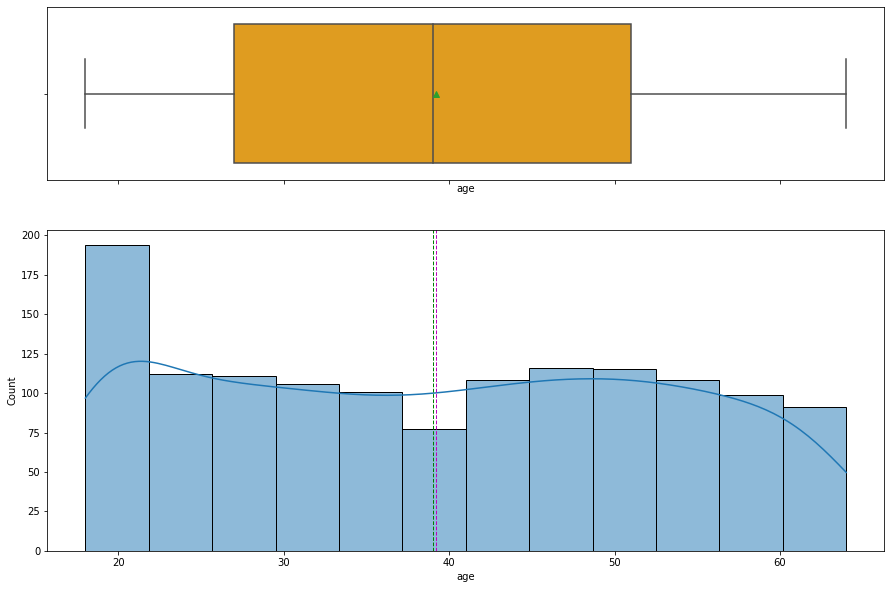

In [17]:
Uni_num(df.age)

#### Observations:
* There are significantly more customers in the 18-24 age bracket.
* The distribution is approximately similar for all other agees.
* There is a slight dip in customer between ages approximately at  37-41yrs
* There are no outliers for this variable


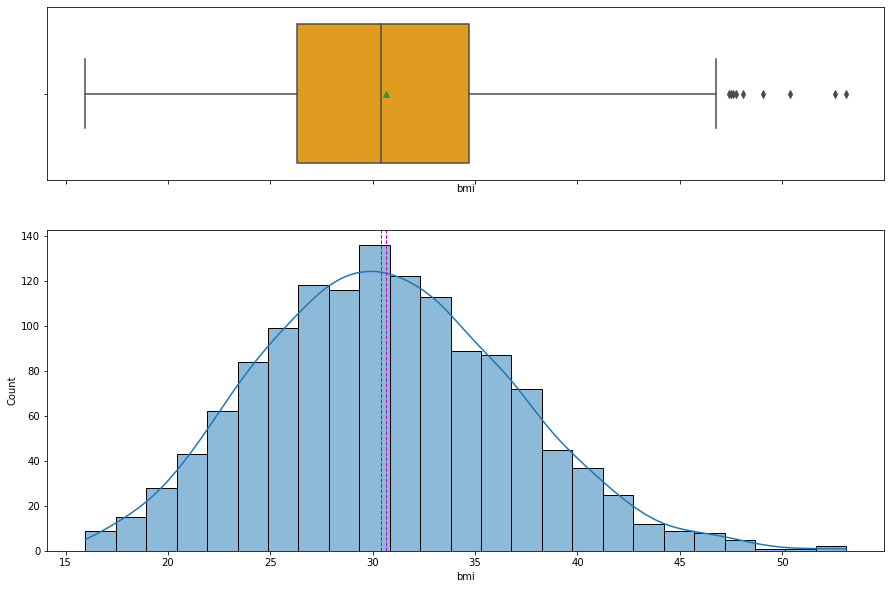

In [18]:
Uni_num(df.bmi)

#### Observations:
* The Mean BMi is around 33, which is above ideal   
  BMI range.
* From box plot we determine that most customers are   above ideal BMI range. 
* There are several outliers in the high end 

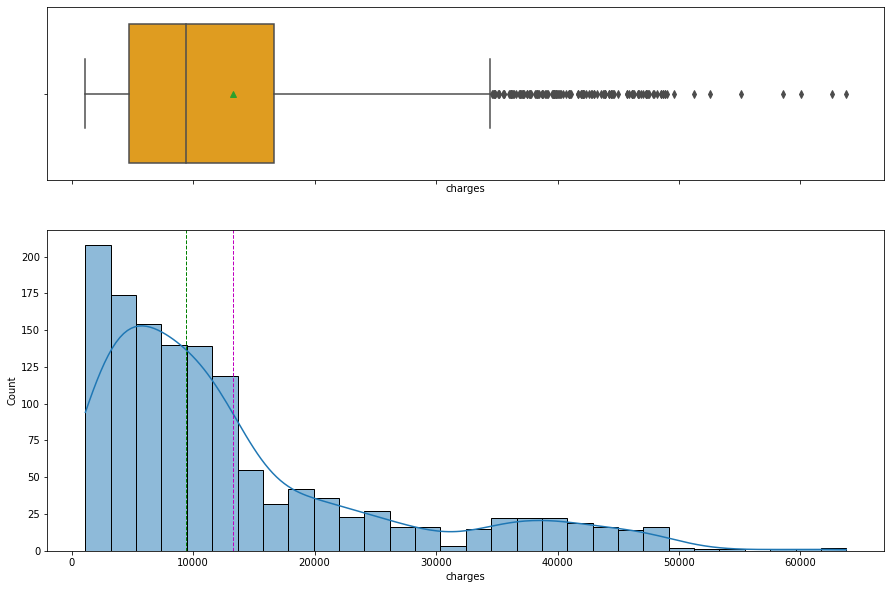

In [19]:
Uni_num(df.charges)

#### Observations:
* Mean charges of claims is around 14000.
* From box plot we see that third quartile is around   17000.
* There are significaly more outliers in the higher 
  end

#### Univariate on Categorical Variables

In [20]:
def Cat_uni(feature,figsize=(10,7)):
    ax=sns.countplot(feature,palette='Dark2')
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + (p.get_width() / 2)-0.1  # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12,color='black') # To annonate the percentage on the barchart

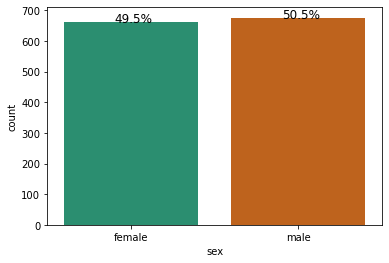

In [21]:
Cat_uni(df.sex)

#### Observations:
* The number of Male customers(50.5%) is more than Female customers(49.5%)

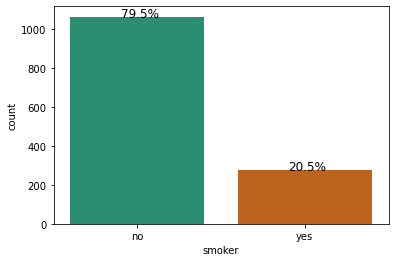

In [22]:
Cat_uni(df.smoker)

#### Observations:
* About 79.5% of claims are from non-smokers.

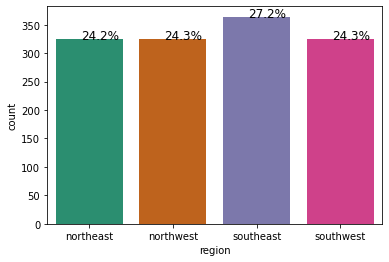

In [23]:
Cat_uni(df.region)

#### Observations:
* Southeast region(27.2%) has slightly more claims than the other three,which are fairly equal.

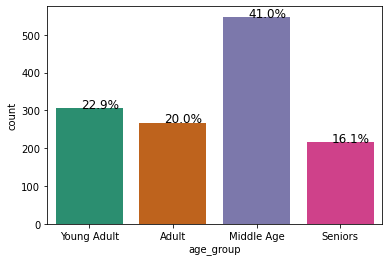

In [24]:
Cat_uni(df.age_group)

#### Observations:
* 40.1% of customers are Middle-Age ie between 36-54 yrs

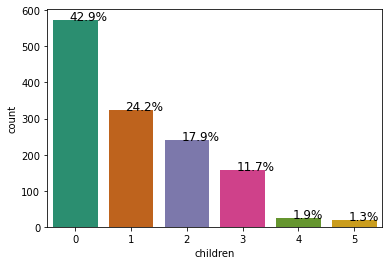

In [25]:
Cat_uni(df.children)

#### Observations:
* Highest claims are from customers with no children(42.9%) followed by 1 child(24.2%) and two children(17.9%)
* There is a significant drop in customers with more than three children 

### Correlation Heat Map

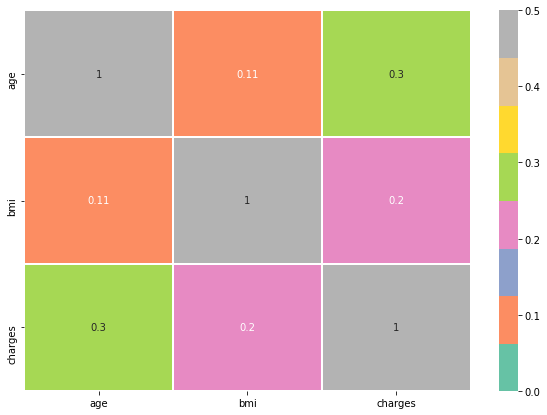

In [26]:
corr= df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot= True,vmin=0,vmax=0.5, cmap='Set2',linewidths=0.75)
plt.show()

#### Observations:
* The values of correlation between variable is 
  quite low, but there is a positive correlation 
  between all three.
* Charges and Age have the highest correlation with 
  Charges and BMI coming second. 
* Age and BMI having very low correlation.This could be investigated further

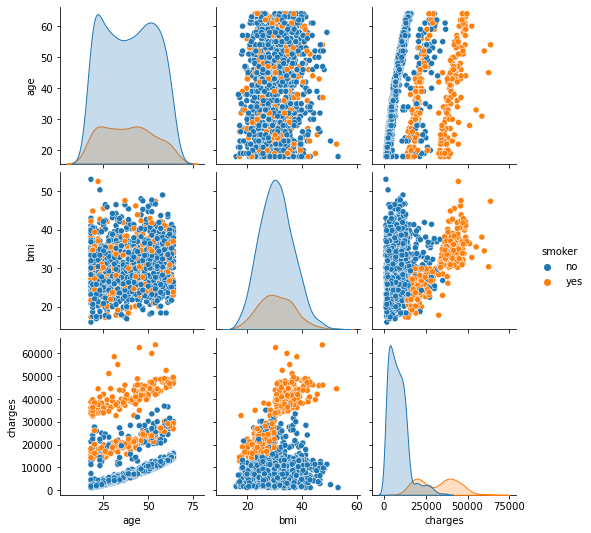

In [27]:
sns.pairplot(data=df,hue='smoker')
plt.show()

#### Observations:
* The pair plot shows a more varying distribution in the variables between smokers and non-smokers.

### Bi and Multivariate Analysis

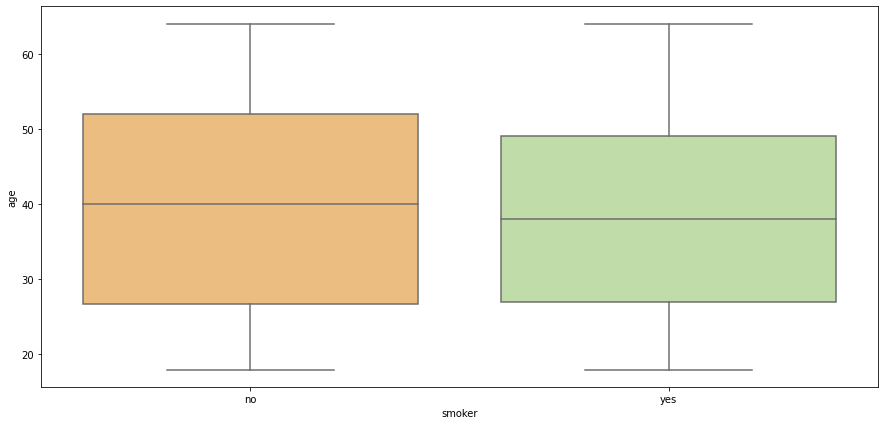

In [28]:
#Smoker Vs Age
plt.figure(figsize=(15,7))
sns.boxplot(df["smoker"],df["age"],palette="Spectral")
plt.show()

#### Observations:
* The mean age for non smokers is 40 yrs
* The mean age for smokers is around 38 yrs
 * Further Analysis with Gender

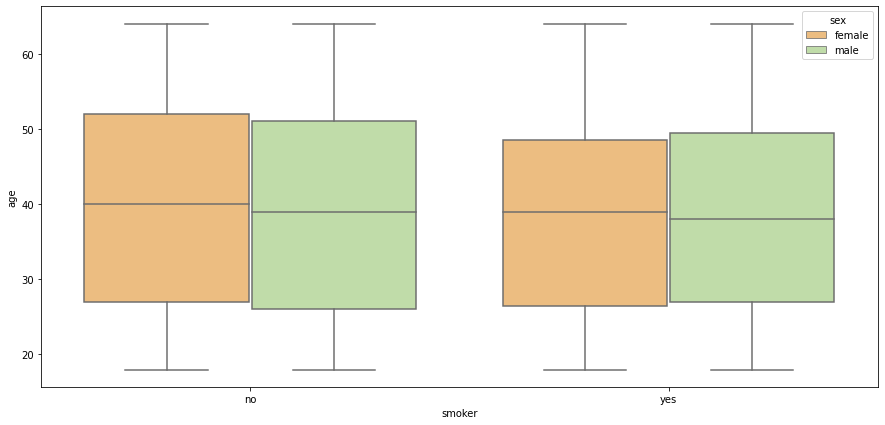

In [29]:
#Smoker Vs Age Vs Sex
plt.figure(figsize=(15,7))
sns.boxplot(df["smoker"],df["age"],hue=df['sex'],palette="Spectral")
plt.show()

#### Observations:
* The mean age in Female customers for both  
  smokers and non-smokers is higher than Male 
  customers

<AxesSubplot:xlabel='smoker', ylabel='count'>

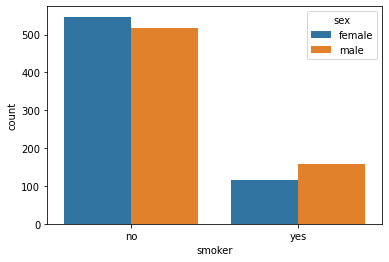

In [30]:
#Smoker Vs Sex
sns.countplot(data=df,x='smoker',hue='sex')

#### Observations:
* There are slightly more male smokers than female smokers.

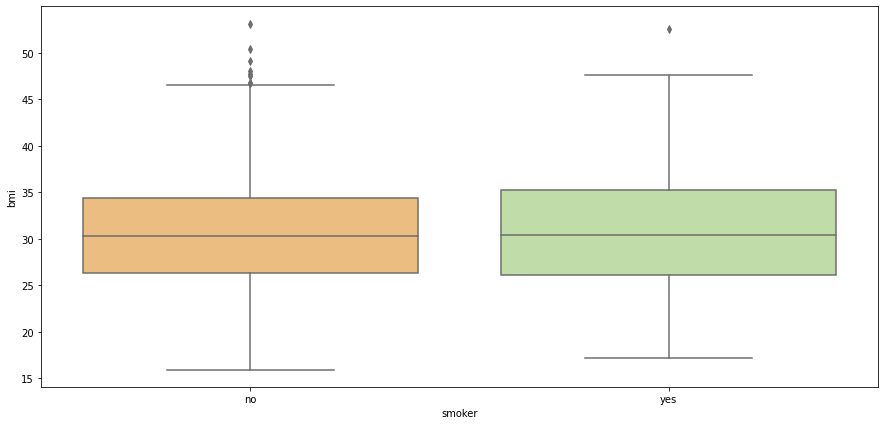

In [31]:
# Smoker Vs BMI
plt.figure(figsize=(15,7))
sns.boxplot(df["smoker"],df["bmi"],palette="Spectral")
plt.show()

#### Observations:
* The mean BMI for both smokers and non-smokers is close to 30.00 
* There are several outliers for non-smokers and only one for Smokers. 

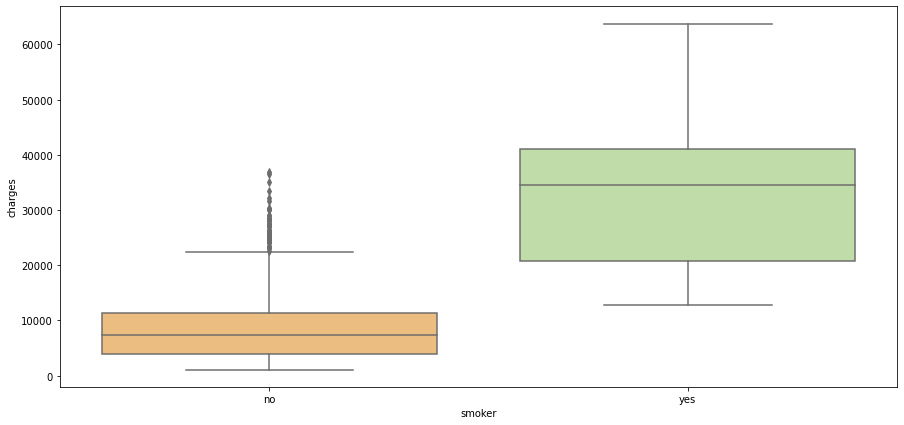

In [32]:
# Smoker Vs Charges
plt.figure(figsize=(15,7))
sns.boxplot(df["smoker"],df["charges"],palette="Spectral")
plt.show()

#### Observations:
* From the box plot, we can see that the mean charges for smokers is very high than for non-smokers.
* There are several outliers in non-smokers.


#### Hypothesis Formulation:

* Null Hypothesis(Ho)- Mean charges of smokers is less or equal to(<=) Mean charges of non-smokers

* Alternate Hypothesis(Ha)-Mean charges of smokers is greater (>) than Mean charges of non-smokers.

* Separating the dataset of charges for smokers and non-smokers.

In [33]:
df2 = df['charges'][df['smoker']=='yes']

In [34]:
df3 = df['charges'][df['smoker']=='no']

* The level of significance (alpha) α= 0.05
* The number of samples = 2
* Since we dont know the variance of population we will perform a One-tailed T-test.


In [35]:
t, p_value = stats.ttest_ind(df3, df2) #since the samples are independent
print('T-stat=',t,'P-value=',p_value) #the p-value is for two-tailed
print('P-value for one-tailed =',p_value/2)
#The T-statistic value does not change for one-tail and two-tail test

T-stat= -46.664921172723716 P-value= 8.271435842177219e-283
P-value for one-tailed = 4.1357179210886093e-283


##### Result:

* Since the p-value is 4.136e-283 which is less than the level of significance 0.05, we reject the Null Hypothesis.

* Hence, this means that the Mean Charges for Smokers is greater than the Mean Charges of Non-smokers.

<AxesSubplot:xlabel='smoker', ylabel='count'>

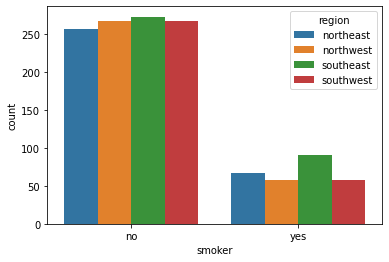

In [36]:
#Smoker Vs Region
sns.countplot(data=df,x='smoker',hue='region')

#### Observations:
* There are slightly more smokers in Southeast region followed by Northeast then the remaining two.


In [37]:
Smoker_region= pd.crosstab(df['smoker'], df['region']) #To show the total distribution across the regions
Smoker_region 

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [38]:
#Calculating the percentages of Smokers/Non-Smokers in each region
Smoker_region_perc= pd.crosstab(df['smoker'], df['region'],normalize='index')
Smoker_region_perc

region,northeast,northwest,southeast,southwest
smoker,,,,
no,0.241541,0.250940,0.256579,0.250940
yes,0.244526,0.211679,0.332117,0.211679


#### Hypothesis Formulation:

* Null Hypothesis(Ho) - The proportion of smokers is not significantly greater across all four regions
* Alternate Hypothesis(Ha) - The proportion of smokers is significantly greater across all four regions                       
* The level of significance (alpha) α= 0.05
* The number of samples = 2
* Since its a frequency based sample, we will perform a Chi-Square test.

In [39]:
chi_stat, p_value,dof,expected = stats.chi2_contingency(Smoker_region)
print('Chi_stat =%.3f,P-value=%.4f'%(chi_stat,p_value))

Chi_stat =7.343,P-value=0.0617


##### Result:
* Since the P-value 0.0617 is greater than the level of significance 0.05, we fail to reject the Null Hypothesis.
* Hence the proportion of smokers is not significantly greater across regions.


* Analysis BMI with Age and Gender


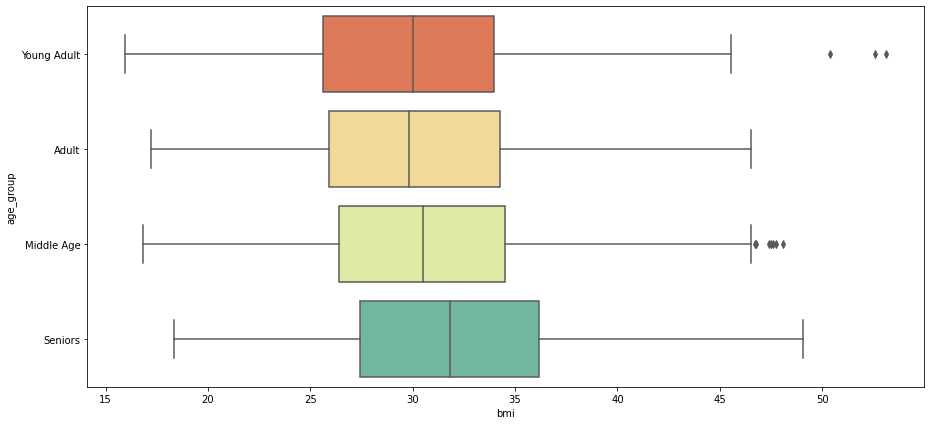

In [40]:
#Since the values of Age is widely distributed, we will analyse with Age_Group
#BMI Vs Age_group
plt.figure(figsize=(15,7))
sns.boxplot(df["bmi"],df["age_group"],palette="Spectral")
plt.show()

#### Observations:
* The box plot show that the mean BMI across all Age-Groups is >=30.
* There are many outliers in the Middle Age groip (36-54 yrs)

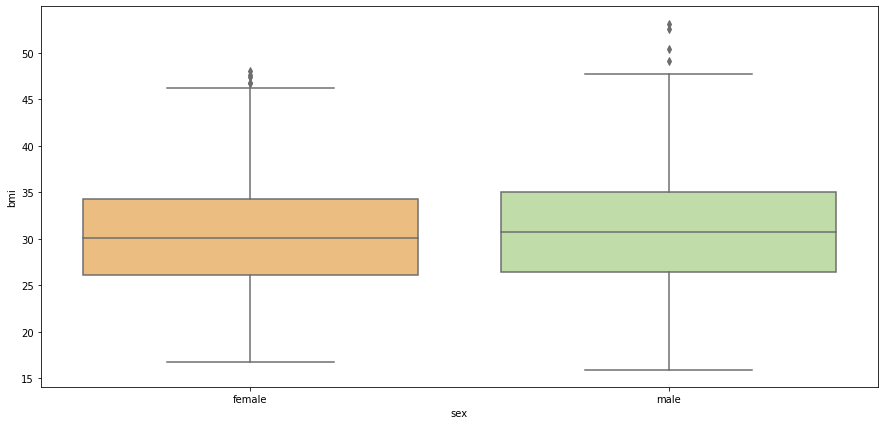

In [41]:
#BMI vs Sex
plt.figure(figsize=(15,7))
sns.boxplot(df["sex"],df["bmi"],palette="Spectral")
plt.show()

#### Observations:
* From the box plot, there seems to be a slight difference in the BMI for Male and Female

* However there are outliers in the plot


In [42]:
df.groupby(['sex']).agg([np.mean, np.median, np.std]).bmi

,mean,median,std
sex,,,
female,30.377749,30.1075,6.046023
male,30.943129,30.6875,6.140435


In [43]:
#Separating the BMI variable for Male and Female.
df5 = df['bmi'][df['sex']=='male'] 

In [44]:
df6 = df['bmi'][df['sex']=='female']   

#### Hypothesis Formulation:

* Null Hypothesis= Ho => Mean BMI of Female is equal to Mean BMI of Male
* Alternate Hypothesis = Ha => Mean BMI of Female not equal to the Mean BMI of Male 
* The level of significance (alpha) α= 0.05
* The number of samples = 2
* Performing Two-Tailed T-test

In [45]:
t_stat, p_value_bmi = stats.ttest_ind(df5,df6)
print('T-stat= %.4f P-value= %.4f'%(t_stat,p_value_bmi)) #the p-value is for two-tailed,for one-tail we must do p-value/2

T-stat= 1.6968 P-value= 0.0900


##### Result
* The P-value 0.090 is greater than 0.05
* Hence We fail to reject the Null Hypothesis.
* Therefore the BMI of Female compared to the Male is not different.

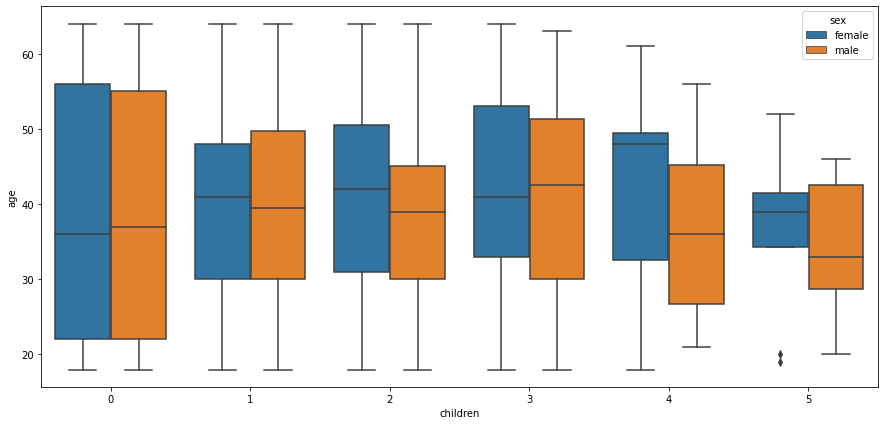

In [46]:
#Age Vs Children Vs Sex
plt.figure(figsize=(15,7))
sns.boxplot(data=df,y='age',x='children',hue='sex')
plt.show()

#### Observations:
* The Mean Age for Male and Female customers with zero children is around 35 yrs
* The Mean Age for Female customers with 1,2,4 & 5 children is higher compared the Mean Age of male customers 
* Whereas the Mean Age of Male customers wiht 3 children is higher than Female customers

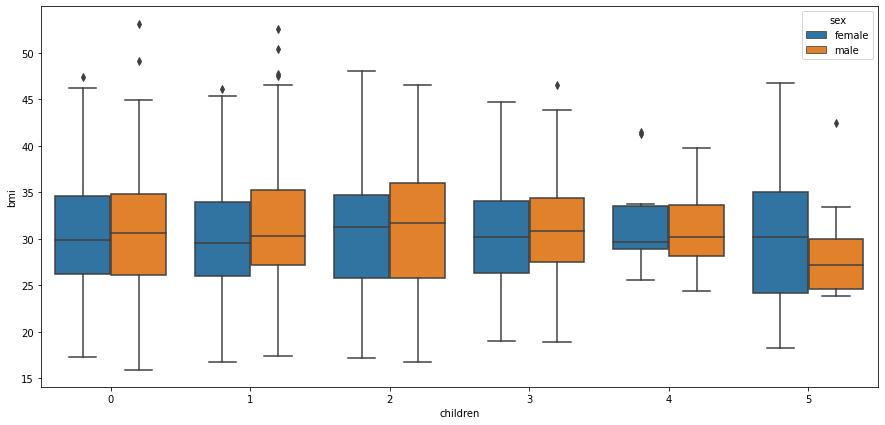

In [47]:
# BMI Vs Children Vs Sex
plt.figure(figsize=(15,7))
sns.boxplot(data=df,y='bmi',x='children',hue='sex')
plt.show()

#### Observations:
* The BMI of Male with 0,1,2,3 &4 children is slightly higher than BMI of Female 
* Only Female with 5 children have a larger BMI in comparison to the males. 
* The Mean BMI of females is different across the Box plot
* There are very few outliers in the high end.

In [48]:
df.groupby(['sex','children']).agg([np.mean, np.median, np.std]).bmi #grouping bmi per child with gender

mean   median       std
sex    children                              
female 0         30.361522  29.9250  5.966934
       1         30.052658  29.5675  5.786831
       2         30.649790  31.3000  6.628200
       3         30.436429  30.2100  5.832741
       4         31.943182  29.6400  5.190395
       5         30.620625  30.2500  8.932533
male   0         30.741719  30.5900  6.115954
       1         31.166145  30.3500  6.356382
       2         31.300992  31.7300  6.401951
       3         30.922937  30.7900  5.769607
       4         30.957500  30.2375  4.283053
       5         28.792500  27.1500  5.707620

#### Hypothesis formulation:

* Null Hypothesis Ho => The Mean BMI of Females with 0,1 & 2 children are equal [μ1 = μ2 = μ3]
* Alternate Hypothesis Ha => The Mean BMI of Females with 0,1 & 2 children are not equal 

* The level of significance (alpha) α= 0.05
* The number of samples = 3
* Since the hypothesis formulation is between three variables, we use the One-Way Anova testing

In [49]:
Anova_stat,p_value_Anova =   stats.f_oneway(
              df['bmi'][(df['sex']=='female')&(df['children']==0)],
              df['bmi'][(df['sex']=='female')&(df['children']==1)],
              df['bmi'][(df['sex']=='female')&(df['children']==2)])

print('The P-value is:%.4f'%p_value_Anova)
print('Anova_statistic is%.4f'%Anova_stat)

The P-value is:0.7159
Anova_statistic is0.3345


##### Result 
* The P-value 0.7159 is greater(>) than 0.05. Hence we fail to reject the Null Hypothesis
* Hence the Mean BMI of Females with 0,1 & 2 children are equal.